In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
sentence=[
    "As it so contrasted oh estimating instrument.",
    "As Size like body some one had.",
    "Are conduct viewing boy minutes warrant expense."
    
]

In [3]:
sentence2=["دوستت دارم", "می خواهم  تو را ببوسم", "تو از من متنفری"]

In [4]:
max_vocab_size=2000
token=tf.keras.preprocessing.text.Tokenizer(num_words=max_vocab_size)
token.fit_on_texts(sentence2)
sequences=token.texts_to_sequences(sentence2)

In [5]:
sequences

[[2, 3], [4, 5, 1, 6, 7], [1, 8, 9, 10]]

In [6]:
token.index_word # show the number related to word:

{1: 'تو',
 2: 'دوستت',
 3: 'دارم',
 4: 'می',
 5: 'خواهم',
 6: 'را',
 7: 'ببوسم',
 8: 'از',
 9: 'من',
 10: 'متنفری'}

In [7]:
data=tf.keras.preprocessing.sequence.pad_sequences(sequences,maxlen=6,padding='post') # padding='pre' > first of sequences
data

array([[ 2,  3,  0,  0,  0,  0],
       [ 4,  5,  1,  6,  7,  0],
       [ 1,  8,  9, 10,  0,  0]])

In [8]:
df=pd.read_csv(r'spam.csv',encoding='ISO-8859-1')
df=df[['v1','v2']]

In [9]:
df.columns=['labels','data']

In [10]:
df.isnull().sum()

labels    0
data      0
dtype: int64

In [11]:
df['labels'], _ = df['labels'].factorize()

In [12]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df['data'], df['labels'].values, test_size=0.33, random_state=22) 

In [13]:
max_vocab_size=20000
token=tf.keras.preprocessing.text.Tokenizer(num_words=max_vocab_size)
token.fit_on_texts(Xtrain)
sequences_train=token.texts_to_sequences(Xtrain)
sequences_test=token.texts_to_sequences(Xtest)

In [24]:
data_train=tf.keras.preprocessing.sequence.pad_sequences(sequences_train) # padding='pre' > first of sequences
data_test=tf.keras.preprocessing.sequence.pad_sequences(sequences_test,maxlen=data_train.shape[1]) # padding='pre' > first of sequences


In [25]:
data_train.shape

(3733, 189)

In [26]:
v=len(token.word_index)
v

7164

In [27]:
D=20 # is optional
M=15 # is optional
i=tf.keras.layers.Input(shape=data_train[1].shape)
x=tf.keras.layers.Embedding(v+1,D)(i)
x=tf.keras.layers.LSTM(M,return_sequences=True)(x)
# you can set return_sequences to false and don’t use globalmaxpooling
x=tf.keras.layers.GlobalMaxPooling1D()(x)
x=tf.keras.layers.Dense(1,'sigmoid')(x)
model=tf.keras.Model(i,x)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 189)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 189, 20)           143300    
                                                                 
 lstm_1 (LSTM)               (None, 189, 15)           2160      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 15)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_1 (Dense)             (None, 1)                 16        
                                                                 
Total params: 145,476
Trainable params: 145,476
Non-trainable params: 0
_____________________________________________________

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x=data_train,y=Ytrain,validation_data=(data_test,Ytest),epochs=10,verbose=2)

In [29]:
history=model.fit(x=data_train,y=Ytrain,validation_data=(data_test,Ytest),epochs=10,verbose=2)


Epoch 1/10
117/117 - 7s - loss: 0.4548 - accuracy: 0.8642 - val_loss: 0.3856 - val_accuracy: 0.8695 - 7s/epoch - 56ms/step
Epoch 2/10
117/117 - 4s - loss: 0.3851 - accuracy: 0.8642 - val_loss: 0.3464 - val_accuracy: 0.8695 - 4s/epoch - 37ms/step
Epoch 3/10
117/117 - 4s - loss: 0.2833 - accuracy: 0.8695 - val_loss: 0.1902 - val_accuracy: 0.9288 - 4s/epoch - 37ms/step
Epoch 4/10
117/117 - 4s - loss: 0.1138 - accuracy: 0.9834 - val_loss: 0.0935 - val_accuracy: 0.9804 - 4s/epoch - 38ms/step
Epoch 5/10
117/117 - 4s - loss: 0.0560 - accuracy: 0.9917 - val_loss: 0.0733 - val_accuracy: 0.9848 - 4s/epoch - 36ms/step
Epoch 6/10
117/117 - 4s - loss: 0.0364 - accuracy: 0.9944 - val_loss: 0.0609 - val_accuracy: 0.9848 - 4s/epoch - 36ms/step
Epoch 7/10
117/117 - 4s - loss: 0.0272 - accuracy: 0.9954 - val_loss: 0.0530 - val_accuracy: 0.9869 - 4s/epoch - 37ms/step
Epoch 8/10
117/117 - 4s - loss: 0.0187 - accuracy: 0.9971 - val_loss: 0.0515 - val_accuracy: 0.9875 - 4s/epoch - 37ms/step
Epoch 9/10
117/1

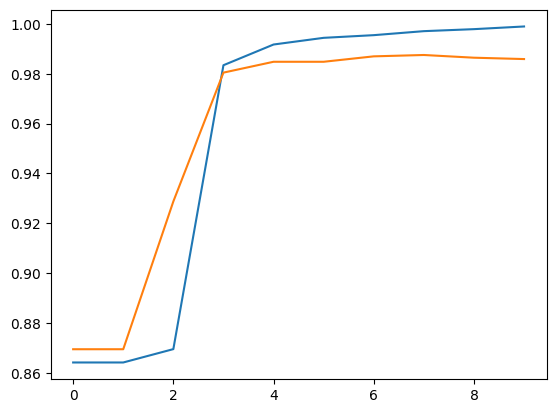

In [30]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.show()

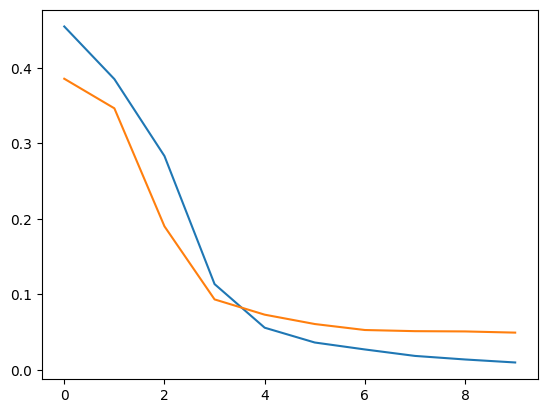

In [31]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.show()

In [35]:
i = tf.keras.layers.Input(shape=data_train[1].shape)
x = tf.keras.layers.Embedding (v + 1, D) (i) # output is T x D 
x = tf.keras.layers.Conv1D(32, 3, activation='relu')(x) # output is T* x M 
x = tf.keras.layers.MaxPooling1D(3)(x) 
x = tf.keras.layers.Conv1D(64, 3, activation='relu')(x) # output is T2 x M2 
x = tf.keras.layers.MaxPooling1D(3)(x) 
x = tf.keras.layers.Conv1D(128, 3, activation='relu')(x) # output is T3 x M3 
x = tf.keras.layers.GlobalMaxPooling1D()(x) # output is M3 
x = tf.keras.layers.Dense(1, activation='sigmoid')(x) # output is 1 
model=tf.keras.Model(i,x)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 189)]             0         
                                                                 
 embedding_5 (Embedding)     (None, 189, 20)           143300    
                                                                 
 conv1d_9 (Conv1D)           (None, 187, 32)           1952      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 62, 32)           0         
 1D)                                                             
                                                                 
 conv1d_10 (Conv1D)          (None, 60, 64)            6208      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 20, 64)           0         
 1D)                                                       

In [36]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x=data_train,y=Ytrain,validation_data=(data_test,Ytest),epochs=10,verbose=2)

Epoch 1/10
117/117 - 2s - loss: 0.3854 - accuracy: 0.8591 - val_loss: 0.2187 - val_accuracy: 0.9103 - 2s/epoch - 17ms/step
Epoch 2/10
117/117 - 1s - loss: 0.0763 - accuracy: 0.9764 - val_loss: 0.0725 - val_accuracy: 0.9755 - 818ms/epoch - 7ms/step
Epoch 3/10
117/117 - 1s - loss: 0.0220 - accuracy: 0.9941 - val_loss: 0.0521 - val_accuracy: 0.9859 - 794ms/epoch - 7ms/step
Epoch 4/10
117/117 - 1s - loss: 0.0059 - accuracy: 0.9992 - val_loss: 0.0571 - val_accuracy: 0.9848 - 809ms/epoch - 7ms/step
Epoch 5/10
117/117 - 1s - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0615 - val_accuracy: 0.9859 - 848ms/epoch - 7ms/step
Epoch 6/10
117/117 - 1s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0578 - val_accuracy: 0.9853 - 811ms/epoch - 7ms/step
Epoch 7/10
117/117 - 1s - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0694 - val_accuracy: 0.9842 - 803ms/epoch - 7ms/step
Epoch 8/10
117/117 - 1s - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0717 - val_accuracy: 0.9842 - 806ms/epoch - 7ms/step
Ep